## Capstone Project

#### by Saiful Hasan

# Vehicle image classification using CNN to determine vehicle make & model

![image](../sample_car_images/toyota-supra-celica-ae86-wallpaper-preview.jpg)

## Table of contents
- [**Problem Statement**](#Problem-Statement)
- [**Executive Summary**](#Executive-Summary)
- [**Import Library**](#Import-Library)
- [**Image Data**](#Image-Data)
- [**Preliminary EDA**](#Preliminary-EDA)
    - [**Taxomony of vehicle analysis**](#Taxomony-of-vehicle-analysis)
    - [**Importance of vehicle make and model recognition in industries**](#mportance-of-vehicle-make-and-model-recognition-in-industries)
    - [**Brief description of Toyota Camry by generations**](#Brief-description-of-Toyota-Camry-by-generations)
    - [**Some key relevant specification of Toyota camry 2007 base model**](#Some-key-relevant-specification-of-Toyota-camry-2007-base-model)
    - [**Convolutional Neural Network (CNN)**](#Convolutional-Neural-Network-(CNN))
    - [**Display Image**](#Display-Image)
    - [**Flip Image**](#Flip-Image)
    - [**Rotate Image**](#Rotate-Image)
    - [**Car Images with different enviornment**](#Car-Images-with-different-enviornment )
    - [**Class counts**](#Class-counts)
- [**Helpful functions**](#Helpful-functions)
- [**Model Preparation**](#Model-Preparation)
- [**Model Exploration**](#Model-Exploration)
- [**Baseline Model**](#Baseline-Model)
- [**Convolution Nueral Network (CNN) Models**](#Convolution-Nueral-Network-(CNN)-Models)
    - [**CNN Model 1 (Original Images)**](#CNN-Models-1-(Original-Images))
    - [**CNN Model 2 (Augmented Images)**](#CNN-Model-2-(Augmented-Images))
- [**Model Selection**](#Model-Selection)
- [**Model Evaluation**](#Model-Evaluation)
    - [**Prediction**](#Prediction)
    - [**CNN Activation visualization**](#CNN-Activation-visualization)
- [**Conclusion**](#Conclusion)
- [**Recommendation**](#Recommendation)


## Problem Statement 

Transportation of goods and people is vital activities in the contemporary world and contribute to economic prosperity and quality of life. The projection of the global vehicle count is an inexact process, but studies have shown an exponential
increase. The estimated current global vehicle count is over 1.2 billion and, according to studies, __the number of vehicle will cross [2 billion](https://www.mdpi.com/2504-4990/1/2/36/pdf) in 2035 or in 2040__. Due to the increasing number of vehicles, automated vehicle analysis has become an important study in many applications. In line with this, __over the recent years Vehicle Make and Model Recognition (VMMR) has evolved into a significant important subject of study due to its importance in numerous Intelligent Transportation Systems (ITS)__. A Vehicle Make and Model Recognition (VMMR) system can provide great value in terms of vehicle monitoring and identification based on vehicle appearance in addition to the vehicles’ attached license plate typical recognition. 

As a member of a data science team of a security company, I am currently involved in a project which aims to develop an effective and precise VMMR model. Our existing vehicle surveillance system has some challenges and is not generating results with satisfactory accuracy. The accuracy of our system sometimes falls short to detect vehicle makes and models if the images are taken in an outdoor environment; if there is any shadows and reflections in captured images and due to a wide variety of available vehicle appearances, visual similarities between different models of different manufacturers, and visual similarities between different models of the same manufacturer. Hence, we want to build a new automatic vehicle surveillance system that would give us more effective and accurate results. __In this project, we intend to utilize several supervised image classification techniques to detect vehicle maker and model. We would use Accuracy as a metric for model selection process__.

## Executive Summary

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, accuracy_score
from sklearn.metrics import classification_report

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.models import load_model
from keras.utils import np_utils, to_categorical
from keras import models

import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from keras.preprocessing import image
%matplotlib inline

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


Using TensorFlow backend.


## Image Data

As we are conducting image recognition method to determine the vehicle make and model, all our data are images. We have collected most of the images from [vmmrdb](http://vmmrdb.cecsresearch.org/) and google images. Therefore, all we have raw images of cars. The images are placed as train set and test set in our local directory and we will use the images directly from our directory to the CNN model. However, we want to record and present the brief picture of our image data here. In this project, we want to build a model that can recognize the **Toyota Camry 2007 base model**. So, we have images of Toyota Camry 2007 base model and images of other random car models. 

In [25]:
#creating csv file with list of all images of Toyota Camry 2007 base model. 

toyota_camry_2007_images = os.listdir('../car_images/train_images/toyota_camry_2007') \
                            + os.listdir('../car_images/test_images/toyota_camry_2007') 

toyota_camry_2007_images_df = pd.DataFrame(toyota_camry_2007_images, columns = ['images'])
toyota_camry_2007_images_df['target'] = 1
toyota_camry_2007_images_df.to_csv('../car_images/toyota_camry_2007_images_df.csv')

In [26]:
#creating csv file with list of all images of non - Toyota Camry 2007 base models (e.g. Audi, Ford etc.) 

not_toyota_camry_2007_images = os.listdir('../car_images/train_images/not_toyota_camry_2007') \
                            + os.listdir('../car_images/test_images/not_toyota_camry_2007') 

not_toyota_camry_2007_images_df = pd.DataFrame(not_toyota_camry_2007_images, columns = ['images'])
not_toyota_camry_2007_images_df['target'] = 0
not_toyota_camry_2007_images_df.to_csv('../car_images/not_toyota_camry_2007_images_df.csv')

In [27]:
#merging and creating a csv file with the list of images for both group 

data = toyota_camry_2007_images_df.append(not_toyota_camry_2007_images_df)

In [28]:
print('number of images:', data.shape[0])
print('number of classes in our images:', data.shape[1])

number of images: 2080
number of classes in our images: 2


In [6]:
data.head()

,images,target
0,toyota_camry_2007 (1).jpg,1
1,toyota_camry_2007 (10).jpg,1
2,toyota_camry_2007 (100).jpg,1
3,toyota_camry_2007 (101).jpg,1
4,toyota_camry_2007 (102).jpg,1


In [7]:
data.tail()

,images,target
901,honda_odyssey_2006 (27).jpg,0
902,honda_odyssey_2006 (28).jpg,0
903,honda_odyssey_2006 (29).jpg,0
904,honda_odyssey_2006 (30).jpg,0
905,toyota_corolla_2011 (16).jpg,0


In [8]:
#checking if there is any missing rows
data.isnull().sum().sum()

0

In [9]:
#masking toyota camry 2007 base model and other random car model
mask_1 = data[data['target'] == 1]
mask_0 = data[data['target'] == 0]

print('Number of images for Toyota Camry 2007 base model:', len(mask_1))
print('Number of images for random car models (not Toyota Camry 2007 base model):', len(mask_0))

Number of images for Toyota Camry 2007 base model: 1174
Number of images for random car models (not Toyota Camry 2007 base model): 906


## Preliminary EDA

### Taxomony of vehicle analysis 

The taxonomy of vehicle analysis is depicted in the Figure below. Vehicle analysis starts with the vehicle
detection. Once the vehicle is detected, we can classify it based on its class (car, bus, truck, etc.),
make (Toyota, Honda, Ford, etc.), color (white, black, red, grey, etc.), or make and model (Toyota Corolla,
Hando Accord, Ford Fusion, etc.). **It needs to be noted that our study in this project is limited to vehicle make and model recognition only.**

Reference: [Real-Time Vehicle Make and Model Recognition System](https://www.mdpi.com/2504-4990/1/2/36/pdf)

![image](../sample_car_images/car_image_taxnomy.jpg)

### Importance of 'vehicle make and model recognition' in industries

1. It provide great value in terms of vehicle monitoring and identification based on vehicle appearance in addition to the vehicles' attached license plate typical recognition. 
2. It's  important component of many applications such as automatic vehicle surveillance 
3. Traffic management, 
4. Driver assistance systems, 
5. Targeted advertisement, 
6. Traffic behaviour analysis, and 
7. Traffic monitoring, and so on 

### Brief description of Toyota Camry by generations

|__Toyota Camry generations__|__Years__|__Brief Descriptions__|
|:---:|:---:|:---|
|`1st Generation`|__1983 - 1987__|The first generation of the Toyota Camry was a small four-door sedan with a 130-horsepower, 2.0-liter engine with a carburetor. This front-wheel-drive car was equipped with a 5-speed manual transmission. Acceleration from 0 to 62 miles per hour was 12 seconds, with a top speed of 108.2 MPH.|
| || |
|`2nd Generation`|__1988 - 1991__|While the body style remained the same, the second generation of the Camry came with improved configurations. The 130-horsepower, four-cylinder unit was the base engine and the car also came with an all-wheel-drive system. A 2.5-liter V6 engine was also optional that made 160 horsepower.|
| || |
|`3rd Generation`|__1992 - 1996__|This was the last generation of Camry sold in the U.S. that offered a station wagon variant. This generation featured cosmetic changes that gave it a smoother, rounded look and a larger overall footprint. For increased comfort, the model also featured a better air conditioning system and was better insulated to eliminate road noise.This generation also introduced a 4-speed automatic transmission, as well as a four-wheel steering system and an optional 3.0-liter V6 engine. A 2.2-liter, four-cylinder engine was standard. This model also saw the switch from a carbureted fuel system to multi-point fuel injection.|
| || |
|`4th generation`|__1997 - 2001__|With this generation Toyota gave the redesigned sedan a new look that featured sleeker, more aerodynamic lines.This generation also saw the introduction of two available versions of the model's engines. The choices included the 133 horsepower, 2.2-liter, four-cylinder engine or the 3.0-liter V6 that made 194 horsepower. The transmission choices remained the same, with the 4-speed automatic or 5-speed manual being the sole choices.|
| || |
|`5th Generation`|__2002 - 2006__|This generation of Toyota's venerable mid-size family sedan grew slightly larger while still providing drivers with the same performance and gas mileage as the smaller, earlier models. This generation notably outsold its rival sedans, making it the best-selling car in the U.S. for several years.The engine options remained with the 4.0-liter and the V6, with horsepower ranging from 152 to 186 depending on the desired motor.|
| || |
|`6th Generation`|__2007 - 2011__|The 6th generation introduced multiple options for its four-door, five-passenger sedan. Four trim levels were offered: the CE, LE, SE and XLE. All of the trim levels came equipped with a four-cylinder, 2.4-liter engine that made 158 horsepower. For those who wanted a larger motor, the LE, SE and XLE came with an optional 3.5-liter V6 engine with 268 horsepower.This generation also saw the introduction of the Hybrid model that used both a gas engine and an electric motor. The Hybrid and the four trim levels came with various transmission options, including a five- or six-speed automatic transmission or the five-speed manual transmission.|
| || |
|`7th Generation`|__2012 - 2017__|The 7th generation was the last Camry to offer a manual transmission. However, most Camry models sold within these years came with a six-speed automatic transmission. The trim levels remain the same as the previous generation (CE, LE, SE and XLE). However, the standard engine has been upgraded to a four-cylinder, 2.5-liter that makes 178 horsepower. This generation also comes with more standard features, including cruise control, power windows, and a power tilt-and-telescoping steering wheel. There are also ports for USB and Bluetooth. Additional features for the higher trim levels include keyless entry and sportier exterior accents such as aluminum wheels and better suspension.|
| || |
|`8th Generation`|__2018 - Present__|The current generation of the Toyota Camry offers two distinct trim levels, with a sporty SE and XSE trim, plus a hybrid variant and the standard L, LE and XLE trims.The standard engine for all levels is a 2.5-liter, four-cylinder with 203 horsepower that gets 34 mpg combined. For the upgraded engine, the higher trim levels come with the option of a 3.5-liter V6 with 301 horsepower.There's also the Camry Hybrid, available in LE, SE and XLE trims. Though there's no power increase over the normal V6's 310-horsepower, changes include a rear spoiler, unique 19-inch alloy wheels wrapped in stickier rubber, larger brake rotors, and numerous tweaks to make the suspension and the body more stiff.|

[Reference: Autolist](https://www.autolist.com/toyota-camry/toyota-camry-generations)


**As we can see that Each generation of Toyota Camry comes with several variants or Trims such as CE, LE, SE, XLE. However, In this study we are dealing with only Toyota Camry 6th general base model. In other words, We would train our model to predict Toyota Camry 2007 based model only as we have sample images of only for the Toyota Camry 2007 base model.**

### Some key relevant specification of *Toyota camry 2007 base model*

|__Toyota Camry 2007 base model__|__Specification__|
|:---|:---|
|`Engine`|__155-hp, 2.4-liter I-4 (regular gas)__|
|`Transmission`|__5-speed automatic/manual w/OD__|
|`Drivetrain`|__Front-wheel drive__|
|`Cruise Control`|__Standard__|
|`City Mile Per Gallon`|__24__|
|`Highway Mile Per Gallon`|__34__|
|`Seats`|__5__|
|`Door counts`|__4__|
|`Length`|__189.2"__|
|`Wheelbase`|__109.3"__|
|`Front Track`|__62.0"__|
|`Rear Track`|__61.6"__|
|`Width`|__71.7"__|
|`Height`|__57.5"__|
|`Turning Radius`|__18.1'__|
|`Horsepower`|__158 @ 6,000 rpm__|
|`Torque`|__161 @ 4,000 rpm__|
|`Fuel Tank Capacity`|__18.5 gallon__|

Reference: [Cars](https://www.cars.com/research/compare/?vehicles=toyota-camry-2007,toyota-camry-2008)

### Convolutional Neural Network (CNN)

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used. 

CNN image classifications takes an input image, process it and classify it under certain categories (Eg., vehicle, cat, dog, human face). Computers sees an input image as array of pixels and it depends on the image resolution. Based on the image resolution, it will see h x w x d( h = Height, w = Width, d = Dimension ). Eg., An image of 6 x 6 x 3 array of matrix of RGB (3 refers to RGB values) and an image of 4 x 4 x 1 array of matrix of grayscale image. Technically, deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.

Reference: [Understanding of Convolutional Neural Network (CNN) — Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)

![image](../sample_car_images/CNN_layers.jpeg)

image source: google

In [10]:
#function to show image

def show_car_image(car_name, fontsize):
    car_image = image.imread('../sample_car_images/'+ car_name +'.jpg')
    
    # summarize shape of the pixel array
    print('Image shape (width, length, and channel):', car_image.shape)
    
    # display the array of pixels as an image
    pyplot.title(car_name, fontsize = fontsize)
    pyplot.xlabel("length",fontsize = fontsize)
    pyplot.ylabel("width",fontsize = fontsize)
    pyplot.imshow(car_image)

In [11]:
#function to rotate image

def image_rotate(car_name, fontsize, rotate):
    car_image = Image.open('../sample_car_images/' + car_name + '.jpg')
    # plot original image
    pyplot.title(car_name, fontsize = fontsize)
    pyplot.imshow(car_image.rotate(rotate))

### Display Image

Image shape (width, length, and channel): (194, 259, 3)


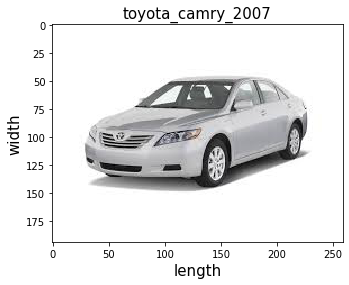

In [12]:
show_car_image('toyota_camry_2007', 15)

This image is 194 pixels wide by 259 pixels high and three channels for red, green, and blue.

### Flip Image

In [13]:
# load image
car_image_2 = Image.open('../sample_car_images/Dodge_charger_2007.png')
# horizontal flip
hoz_flip = car_image_2.transpose(Image.FLIP_LEFT_RIGHT)
# vertical flip
ver_flip = car_image_2.transpose(Image.FLIP_TOP_BOTTOM)

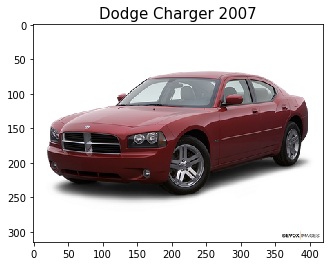

In [14]:
pyplot.title("Dodge Charger 2007", fontsize = 15);
pyplot.imshow(car_image_2)

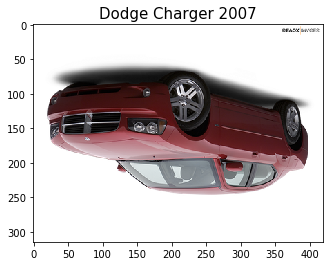

In [15]:
pyplot.title("Dodge Charger 2007", fontsize = 15);
pyplot.imshow(ver_flip)

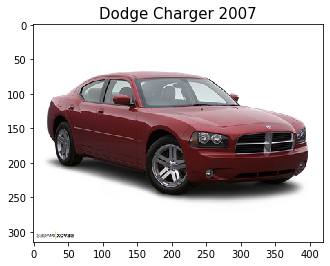

In [16]:
pyplot.title("Dodge Charger 2007", fontsize = 15)
pyplot.imshow(hoz_flip)

### Rotate Image

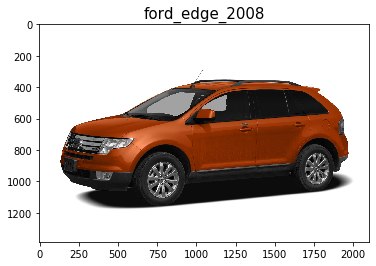

In [17]:
image_rotate('ford_edge_2008', 15, 0)

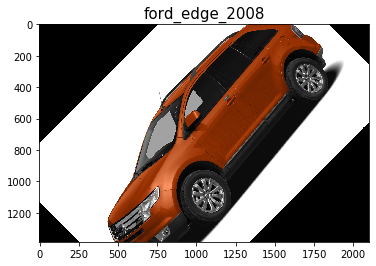

In [18]:
# rotate 45 degrees
image_rotate('ford_edge_2008', 15, 45)

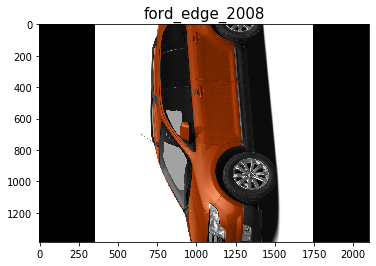

In [19]:
# rotate 90 degrees
image_rotate('ford_edge_2008', 15, 90)

### Car Images with different enviornment 

Since we intend to mitigate few challenges we have in our exciting vehicle recognition system, we have inlcuded images of cars in different enviornmeents such as car images taken into outdoor, car images with shadows and refelctions, and images of cars with similar external styles from same manufacturers  

#### *Images taken into outdoor*

Image shape (width, length, and channel): (450, 600, 3)


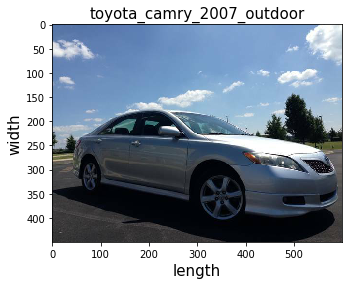

In [20]:
show_car_image('toyota_camry_2007_outdoor', 15)

#### *Shadows and reflections in captured images*

Image shape (width, length, and channel): (450, 600, 3)


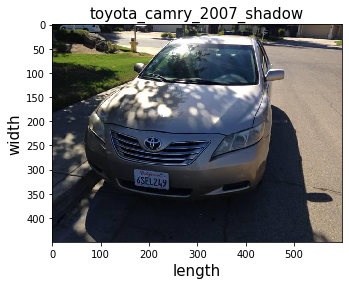

In [21]:
show_car_image('toyota_camry_2007_shadow', 15)

#### *Visual similarities between different models of the same manufacturer*

Image shape (width, length, and channel): (450, 600, 3)


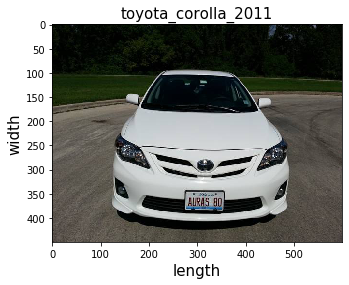

In [22]:
show_car_image('toyota_corolla_2011', 15)

### Class counts

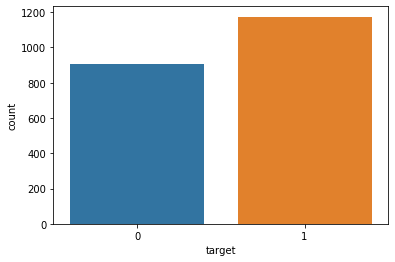

In [23]:
sns.countplot( x = data['target'], data = data)

## Helpful functions

In [24]:
def rezise_image(image_directory):
    for image in (os.listdir(image_directory)):
            image_dir = image_directory + '/' + image
            image = Image.open(image_dir)
            width, height = image.size # Stores image height and width as variables
            image = image.resize((150,150)) # Reshape images that are not 90 x 110 
            #image = image.convert('L') # Converts image to grayscale
            image.save(image_dir, optimize=True) 

In [25]:
#function for plotting accuracy and loss

def plot_accuracy_loss(model_history):
    fig, axes = plt.subplots(nrows = 1,ncols = 2, figsize=(15, 5))
    axs = axes.ravel()
    
    # Plotting accuracy over epochs
    axs[0].plot(model_history.history['binary_accuracy'], label='Train Accuracy')
    axs[0].plot(model_history.history['val_binary_accuracy'], label='Test Accuracy')
   
    
    # Setting title
    axs[0].set_title("Training and Test Accuracy", fontsize = 15)
    axs[0].set_xlabel('Epoch', fontsize=10)
    axs[0].set_ylabel('Accuracy', fontsize=10)
   
    
    # Setting legend
    axs[0].legend(fontsize = 15)

   # Plotting loss over epochs
    axs[1].plot(model_history.history['loss'], label='Training Loss')
    axs[1].plot(model_history.history['val_loss'], label='Test Loss')
    
    
    # Setting title
    axs[1].set_title("Training and Testing Loss", fontsize = 15)
    axs[1].set_xlabel('Epoch', fontsize = 10)
    axs[1].set_ylabel('Binomial Crossentropy', fontsize = 10)
   
    
    # Setteing legend
    axs[1].legend(fontsize = 15)
    plt.tight_layout(pad=2.0)

In [26]:
#adopted code from Mahdi Shadkam-Farrokhi

def graph_loss(history):
    '''
    Graphs the training and testing loss using the given History object from model training
    '''
    # Check out our train loss and test loss over epochs.
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    xticks = np.array(range(len(train_loss)))
    # Set figure size.
    plt.figure(figsize=(6, 5))

    # Generate line plot of training, testing loss over epochs.
    plt.plot(train_loss, label='Training Loss', color='#185fad')
    plt.plot(test_loss, label='Testing Loss', color='orange')

    # Set title
    plt.title('Training and Testing Loss by Epoch', fontsize = 25)
    plt.xlabel('Epoch', fontsize = 18)
    plt.ylabel('Crossentropy', fontsize = 18)
    plt.xticks(xticks[::5], (xticks+1)[::5])

    plt.legend(fontsize = 18);

In [21]:
#adopted and modified code from Mahdi Shadkam-Farrokhi

def graph_accuracy(history):
    '''
    Graphs the training and testing loss using the given History object from model training
    '''
    # Check out our train loss and test loss over epochs.
    train_accuracy = history.history['binary_accuracy']
    test_accuracy = history.history['val_binary_accuracy']
    xticks = np.array(range(len(train_accuracy)))
    # Set figure size.
    plt.figure(figsize=(6, 5))

    # Generate line plot of training, testing loss over epochs.
    plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
    plt.plot(test_accuracy, label='Testing Accuracy', color='orange')

    # Set title
    plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
    plt.xlabel('Epoch', fontsize = 18)
    plt.ylabel('Crossentropy', fontsize = 18)
    plt.xticks(xticks[::5], (xticks+1)[::5])

    plt.legend(fontsize = 18);

In [20]:
#adopted code from Mahdi Shadkam-Farrokhi

def train_test_score(model_history):
    train_test_scores = list(zip(model_history.history['binary_accuracy'], model_history.history['val_binary_accuracy']))
    train_test_scores.sort(key=lambda scores: scores[1])
    print('train accuracy score and test accuracy score:', train_test_scores[-1])

## Model Preparation

To have the homogeneity of the images we have resized all the images to 150 x 150

In [30]:
car_list = ['not_toyota_camry_2007', 'toyota_camry_2007']

for car in car_list:
    car_directory = '../car_images/test_images/' + car
    rezise_image(car_directory)

In [31]:
for car in car_list:
    car_directory = '../car_images/train_images/' + car
    rezise_image(car_directory)

We are setting some inputs for the models we would run below.

In [2]:
# dimensions of our images.
image_width, image_height = 150, 150

train_data_directory = '../car_images/train_images'
test_data_directory = '../car_images/test_images'

nb_train_samples = 1352
nb_test_samples = 494
epochs = 48
batch_size = 32
input_shape = (image_width, image_height, 3)

## Model Exploration

1. **Baseline Model**
2. **CNN model 1:**
    - CNN model with No transformation (original dataset)
3. **CNN model 2:** 
    - CNN model with augmented images - Rotated and Mirror transformed
4. **CNN model 3 :**
    

## Baseline Model

Baseline model helps to evaluate the efficacy of our models.For classification analysis, there is no mean to predict, so a baseline classification model simply predicts the most frequently occurring class.

In [29]:
print('Baseline model accuracy:', round(data['target'].value_counts(normalize=True).max()*100, 2),'%')

Baseline model accuracy: 56.44 %


The baseline model accuracy is 56.44%. The accuracy of our baseline model is not so high and at satisfactory level. We would try a few different model and see if we could get better accuracy than the baseline model accuracy. 

## Convolution Nueral Network (CNN) Models

Before we run the models, here are some more specific explanations of the CNN model we would explore in later sections. The entire process of our CNN model is as below:

- ImageDataGenerator pulls the raw images directly from the image directory durinf training and tetsing process. Each ImageDataGenerator is also resposible for normalizing the images and resizing the images to 150 x 150. However, we have already resized our images to this proportion, but still we will use this argument in our *datagen_test(/train).flow_from_directory* function just to get ensured that our model is getting same sized images as input. ImageDataGenerator is also responsbile for image scaling, as well as to apply the appropriate transformation for training test images. 

- These images are fed into an initial group of "Conv> Pooling > Dropout" layers
- Followed by four more implementations of the previous "Conv> Pooling > Dropout" pattern; the data are then flattened and fed into two Dense layers 

- And finally a single node output Dense layer


Let's know more about the model:

- **Epoch**: Epoch refers to the number of the times an entire dataset passed forward and backward through the neural network. So, in our model Epoch 48 means our entire dataset would passed forward and backward through the neural networks fr 48 times.

- **ReLU**: It stands for **RE**ctified **L**inear **U**nit and is the most commonly used activation function in neural networks, especially in CNNs. ReLU is linear (identity) for all positive values, and zero for all negative values. It in effect results in faster converges.

- **Convolutional layers** in a convolutional neural network (CNN) summarize the presence of features in an input image.

![Convo](../sample_car_images/convo.gif) (*gif source:google*)

- **Max pooling** calculates the maximum value for each patch of the feature map.

![maxpooling](../sample_car_images/maxpool_animation.gif) (*gif source:google*)

- **Dropout** is one type of regularization techniques which is used to avoid overfitting (increase the validation accuracy) thus increasing the generalizing power.

- **Sigmoid** activation function is traditionally used for binary classification. In Sigmoid, the input to the function is transformed into a value between 0.0 and 1.0

## CNN Model 1 (Original Images)

In [48]:
cnn_model_1 = Sequential()
cnn_model_1.add(Conv2D(filters=32, 
            kernel_size=(3,3), 
            activation='relu',
            input_shape=input_shape
            #padding = 'same',
            ))

#cnn_model_1.add(Conv2D(filters=16, kernel_size=5, activation='relu')) 
cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_1.add(Dropout(0.25))

# Second conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=4, activation='relu')) 
cnn_model_1.add(Conv2D(filters=128, kernel_size=4, activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_1.add(Dropout(0.25))

# Third conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu',  kernel_regularizer=regularizers.l1(0.01))) 
cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size = (2,2)))
cnn_model_1.add(Dropout(0.2))

# Fourth conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu',  kernel_regularizer=regularizers.l1(0.01))) 
cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_1.add(Dropout(0.2))

# Fifth conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu',  kernel_regularizer=regularizers.l1(0.01))) 
cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_1.add(Dropout(0.2))

# sixth conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu')) 
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
#cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_1.add(Dropout(0.2))

# Flatten layer to pass through dense layer
cnn_model_1.add(Flatten())

# Dropout layer to avoid overfitting
#cnn_model.add(Dropout(rate=1 - 0.5))

# Densely connected layer
#cnn_model.add((Dense(256, activation='relu')))

# Densely connected layer
#cnn_model.add((Dense(218, activation='relu')))
# Densely connected layer
#cnn_model_1.add((Dense(256, activation='relu')))
#cnn_model_1.add((Dense(128, activation='relu')))
cnn_model_1.add((Dense(64, activation='relu')))
cnn_model_1.add((Dense(32, activation='relu')))
# Output layer with nine output neurons

cnn_model_1.add(Dense(1, activation='sigmoid'))

In [49]:
cnn_model_1.compile(loss='binary_crossentropy',  
              optimizer='adam',
              metrics=['binary_accuracy'])


In [50]:
datagen_train = ImageDataGenerator(rescale=1. / 255,
                                   #rotation_range= 0,
                                   #width_shift_range=0.3,
                                   #height_shift_range=0.3,
                                   #zoom_range=0.3,
                                   #shear_range=0.3,
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   fill_mode='nearest')

train_generator = datagen_train.flow_from_directory(
                                                    train_data_directory,
                                                    target_size=(image_width, image_height),
                                                    #batch_size=batch_size,
                                                    color_mode = 'rgb',
                                                    class_mode='binary',
                                                    shuffle = True,
                                                    seed = RANDOM_STATE)


Found 1552 images belonging to 2 classes.


In [51]:
datagen_test = ImageDataGenerator(rescale=1. / 255)

test_generator = datagen_test.flow_from_directory(
                test_data_directory,   #path to the target directory
                target_size=(image_width, image_height),  #The dimensions to which all images found will be resized.
               # batch_size=batch_size,  #Size of the batches of data 
                class_mode='binary',  #classification type
                color_mode = 'rgb',   #color mode: rgb/grayscle/rgba
                shuffle = False)  # Whether to shuffle the data, True or False


Found 528 images belonging to 2 classes.


In [52]:
#early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto')

history_1 = cnn_model_1.fit_generator(
                                    train_generator,
                                    #steps_per_epoch=nb_train_samples // batch_size,
                                    epochs=epochs,
                                    validation_data=test_generator,
                                    #validation_steps=nb_test_samples // batch_size,
                                    verbose=0)



In [53]:
cnn_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 128)       65664     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 32)       

**Since I have set my metric as accurcay, I will investigate the accuracy score of the model. According to theory the more accuracy score the better.**

In [54]:
train_test_score(history_1)

train accuracy score and test accuracy score: (0.8917526, 0.8712121248245239)


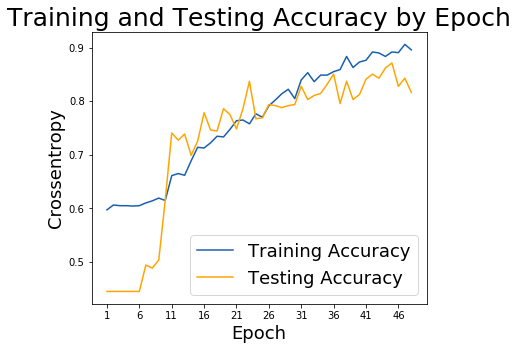

In [55]:
graph_accuracy(history_1)

We can see that the train accuracy and test accuracy were ups and down through the epochs. From 16 to 32ish epochs the accuracy scores on both dataset were more or less close enough. Afterwards it started get wider. However, at the end the accuracy scores on both dataset turned back to each other and we got best fitting sccuracy score. The accuracy score at 48th Epoch was 90% on train set and 88% on test set. Which is acceptable and perfect. Though The accuracy were not above 90%, we got our best fit model. We will examine the model performances afterwards. We will also try CNN model with augmented images to see if it increases the accuracy score even further. 

In [61]:
cnn_model_1.save_weights('../model/best_cnn_model.h5')

## CNN Model 2 (Augmented Images)

In [13]:
cnn_model_2 = Sequential()
cnn_model_2.add(Conv2D(filters=32, 
            kernel_size=(3,3), 
            activation='relu',
            input_shape=input_shape,
            padding = 'same',
            ))

#cnn_model_1.add(Conv2D(filters=16, kernel_size=5, activation='relu')) 
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_2.add(Dropout(0.25))

# Second conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=4, activation='relu')) 
cnn_model_2.add(Conv2D(filters=128, kernel_size=4, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_2.add(Dropout(0.25))

# Third conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu',  kernel_regularizer=regularizers.l1(0.01))) 
cnn_model_2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size = (2,2)))
cnn_model_2.add(Dropout(0.2))

# Fourth conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu',  kernel_regularizer=regularizers.l1(0.01))) 
cnn_model_2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_2.add(Dropout(0.2))

# Fifth conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu',  kernel_regularizer=regularizers.l1(0.01))) 
cnn_model_2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_2.add(Dropout(0.2))

# sixth conv module
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu')) 
#cnn_model_1.add(Conv2D(filters=32, kernel_size=3, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
#cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_2.add(Dropout(0.2))

# Flatten layer to pass through dense layer
cnn_model_2.add(Flatten())

# Dropout layer to avoid overfitting
#cnn_model.add(Dropout(rate=1 - 0.5))

# Densely connected layer
#cnn_model.add((Dense(256, activation='relu')))

# Densely connected layer
#cnn_model.add((Dense(218, activation='relu')))
# Densely connected layer
#cnn_model_1.add((Dense(256, activation='relu')))
#cnn_model_1.add((Dense(128, activation='relu')))
cnn_model_2.add((Dense(64, activation='relu')))
cnn_model_2.add((Dense(32, activation='relu')))
# Output layer with nine output neurons

cnn_model_2.add(Dense(1, activation='sigmoid'))

In [14]:
cnn_model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])


In [15]:
datagen_train = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range= 30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.3,
                                   zoom_range=0.3,
                                   shear_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   brightness_range = [.5, 2.],
                                   fill_mode='nearest')

train_generator = datagen_train.flow_from_directory(
                                                    train_data_directory,
                                                    target_size=(image_width, image_height),
                                                    batch_size=batch_size,
                                                    color_mode = 'rgb',
                                                    class_mode='binary',
                                                    shuffle = True,
                                                    seed = RANDOM_STATE)


Found 1552 images belonging to 2 classes.


In [16]:
datagen_test = ImageDataGenerator(rescale=1. / 255)

test_generator = datagen_test.flow_from_directory(
                                                test_data_directory,
                                                target_size=(image_width, image_height),
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                color_mode = 'rgb',
                                                shuffle = False
                                                )


Found 528 images belonging to 2 classes.


In [17]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto')

history_2 = cnn_model_2.fit_generator(
                                    train_generator,
                                    steps_per_epoch=nb_train_samples // batch_size,
                                    epochs=epochs,
                                    validation_data=test_generator,
                                    validation_steps=nb_test_samples // batch_size,
                                    callbacks=[early_stop],
                                    verbose=0)



In [18]:
cnn_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 128)       65664     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 32)       

In [22]:
train_test_score(history_2)

train accuracy score and test accuracy score: (0.60768074, 0.506465494632721)


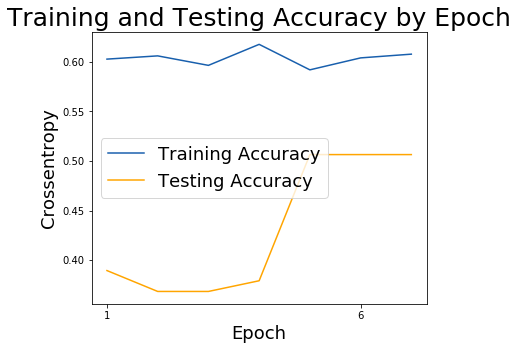

In [23]:
graph_accuracy(history_2)

We see that this model doesn't perform well at all. 

## Model Selection

Our chosen metric accuracy takes into account all true predictions, both true positives and true negatives. The equation is as below:

$$
Accuracy = \frac{All\ Correct}{All\ Predictions}
$$

$$
= \frac{(TP + TN)} {(TP + FP + TN + FN)}
$$


||__Accuracy Score__|
|:---|:---:|
|`Baseline Model`|__56.4%__|

|__Model__|__Accuracy Score on train set__|__Accuracy Score on test sert__|
|:---|:---:|:---:|
|`CNN Model 1`|__89.2%__|__87.1%__|
|`CNN Model 2`|__60.8%__|__50.6%__|

## Model Evaluation

In [56]:
#test_generator = train_datagen[1]
test_generator.reset()

_preds = cnn_model_1.predict_generator(test_generator)
preds = (_preds >= .5).astype(int).flatten()

orig_preds = pd.DataFrame({
    "images"       : test_generator.filenames,
    "actual" : test_generator.classes,
    "pred"       : preds
})

orig_missed = orig_preds[orig_preds["actual"] != orig_preds["pred"]]
orig_missed.shape

(97, 3)

In [57]:
orig_preds.head()

,images,actual,pred
0,not_toyota_camry_2007\1 (82).jpg,0,0
1,not_toyota_camry_2007\1 (83).jpg,0,1
2,not_toyota_camry_2007\1 (84).jpg,0,0
3,not_toyota_camry_2007\1 (85).jpg,0,1
4,not_toyota_camry_2007\1 (86).jpg,0,1


In [58]:
orig_preds.tail()

,images,actual,pred
523,toyota_camry_2007\toyota_camry_2007 (938).jpg,1,1
524,toyota_camry_2007\toyota_camry_2007 (939).jpg,1,1
525,toyota_camry_2007\toyota_camry_2007.jpg,1,1
526,toyota_camry_2007\toyota_camry_2007_29.jpg,1,1
527,toyota_camry_2007\toyota_camry_2007_394.jpg,1,1


In [59]:
mask = orig_preds[orig_preds['actual'] != orig_preds['pred']]

In [60]:
mask

,images,actual,pred
1,not_toyota_camry_2007\1 (83).jpg,0,1
3,not_toyota_camry_2007\1 (85).jpg,0,1
4,not_toyota_camry_2007\1 (86).jpg,0,1
11,not_toyota_camry_2007\2 (10).jpg,0,1
12,not_toyota_camry_2007\2 (11).jpg,0,1
...,...,...,...
293,toyota_camry_2007\toyota_camry_2007 (10).jpg,1,0
314,toyota_camry_2007\toyota_camry_2007 (274).jpg,1,0
337,toyota_camry_2007\toyota_camry_2007 (33).jpg,1,0
339,toyota_camry_2007\toyota_camry_2007 (35).jpg,1,0


### Prediction

Let's see how our model is effective in solve the challenges we discussed in the problem statement. In this section we will input car images from our test data and see if the bet fit model can preedict it correctly. 

In [65]:
#function for prediction
#adopted and modified code from towardsdatascience blogpost on visualizing intermediate activation in CNN with keras

def prediction(path, car,model):
    img_path = '../car_images/test_images/' + path+ '/' + car + '.jpg'
    img = image.load_img(img_path, target_size=(150, 150, 3))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    plt.imshow(img_tensor[0])
    plt.show()
    print(img_tensor.shape)
    
    # predicting images
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    print("Predicted class is:",classes)# predicting images

#####  Toyota camry 2007

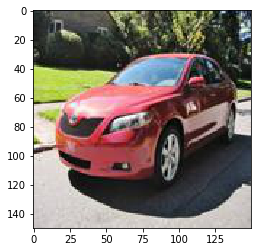

(1, 150, 150, 3)
Predicted class is: [[1]]


In [66]:
prediction('toyota_camry_2007','toyota_camry_2007', cnn_model_1)

The model predicted the car correctly. Now try with similar color car, and see if the model can perform correctly.

##### Random cars model

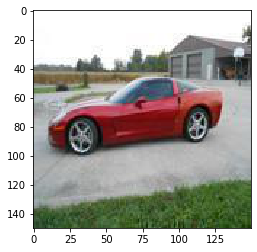

(1, 150, 150, 3)
Predicted class is: [[1]]


In [67]:
prediction('not_toyota_camry_2007','chevrolet_covette_2005 (30)', cnn_model_1)

The model predicted wrong this time. let's try any other red cars and see if our model can predict correctly.

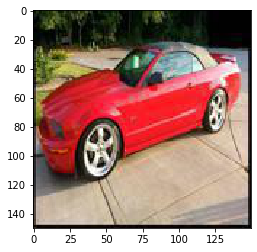

(1, 150, 150, 3)
Predicted class is: [[0]]


In [68]:
prediction('not_toyota_camry_2007','3 (87)', cnn_model_1)

Yes ! the model predicted right this time

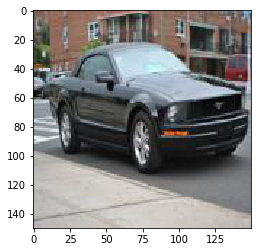

(1, 150, 150, 3)
Predicted class is: [[0]]


In [69]:
prediction('not_toyota_camry_2007','3 (83)', cnn_model_1)

Prediction correct!

##### Car model from same manufacturer

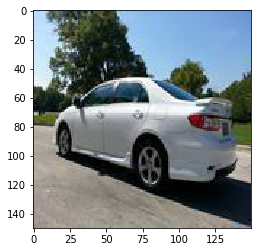

(1, 150, 150, 3)
Predicted class is: [[0]]


In [70]:
prediction('not_toyota_camry_2007','toyota_corolla_2011 (16)', cnn_model_1)

##### Toyota Camry 2007 model in shadows

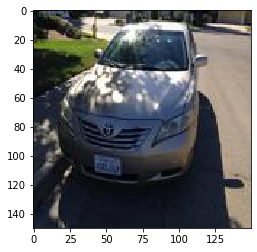

(1, 150, 150, 3)
Predicted class is: [[1]]


In [71]:
prediction('toyota_camry_2007','toyota_camry_2007_394', cnn_model_1)

### CNN Activation visualization

In [72]:
#adopted code from Mahdi Shadkam-Farrokhi

def show_layers(activations, ith_image, ith_layer, title = "Title", n_cols = 8, img_h = 2.5, img_w = 2, subset = None, artist = None,**kwargs):
    '''Plots all images for each filter in the give activations layer'''
    num = subset or activations[ith_layer].shape[3]
    n_rows = int(np.ceil(num/n_cols))

    f, axes = plt.subplots(nrows = n_rows, ncols = n_cols, figsize= (img_w * n_cols, img_h * num / n_cols))
    for i in range(num):
        ax = axes[i//n_cols][i%n_cols] if not subset else axes[i]
        ax.matshow(activations[ith_layer][ith_image,:,:, i])
        ax.set_title(f"Filter #{i+1}", pad = 0)
        ax.tick_params(bottom = False, left = False, top=False, labeltop = False, labelbottom = False, labelleft = False)     
        if artist:
            artist(ax)
    while not subset and i < n_cols * n_rows -1:
        i += 1
        f.delaxes(axes[i//n_cols][i%n_rows])
    f.suptitle(title, fontsize = 24, y = kwargs.get("y") or .94)

In [73]:
classifier = cnn_model_1
len(classifier.layers)

20

In [76]:
img_path = '../car_images/test_images/toyota_camry_2007/toyota_camry_2007.jpg'
img = image.load_img(img_path, target_size=(150, 150, 3))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

layer_outputs = [layer.output for layer in classifier.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activations = activation_model.predict(img_tensor) 

In [77]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


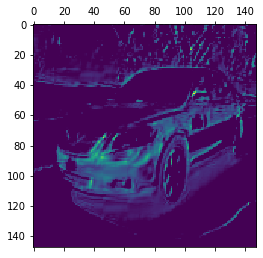

In [79]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

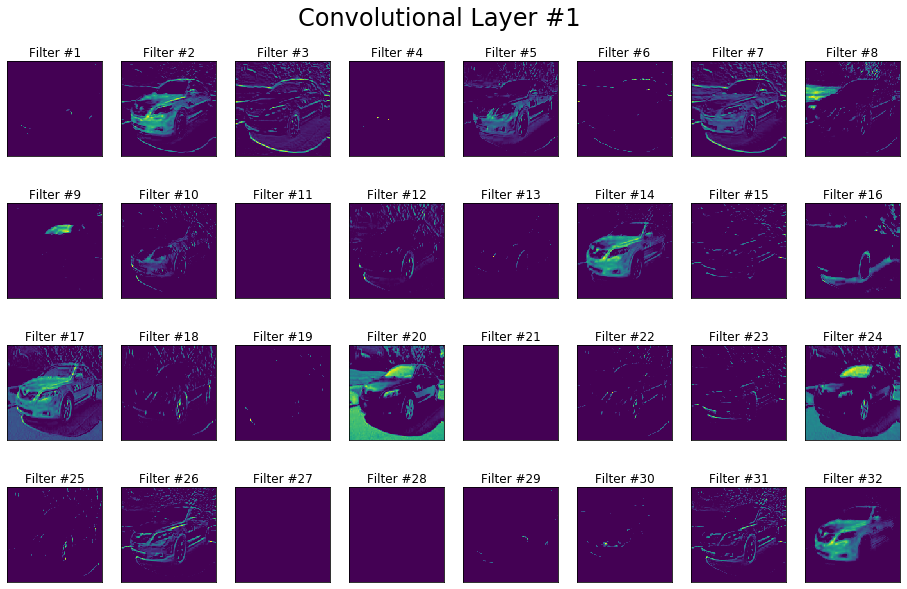

In [80]:
show_layers(activations, 0, 0, title = "Convolutional Layer #1")

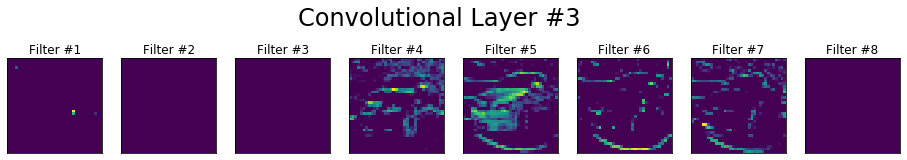

In [81]:
show_layers(activations, 0, 4, subset = 8, title = "Convolutional Layer #3", **{"y": 1.05})

C:\Users\Bruker\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


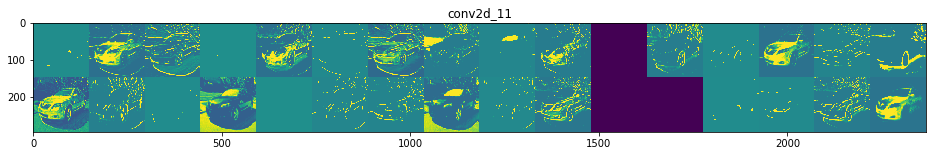

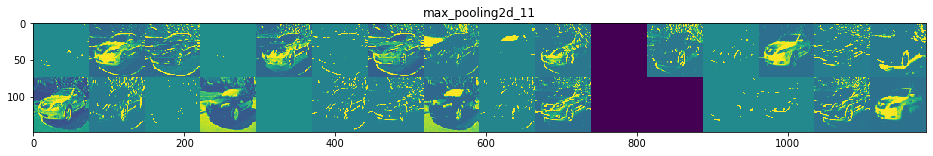

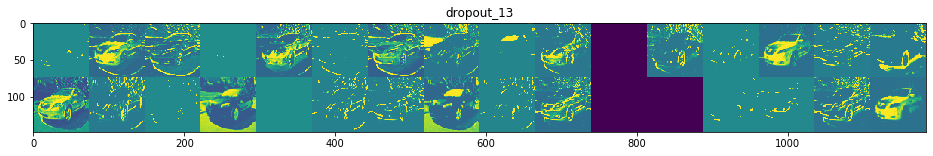

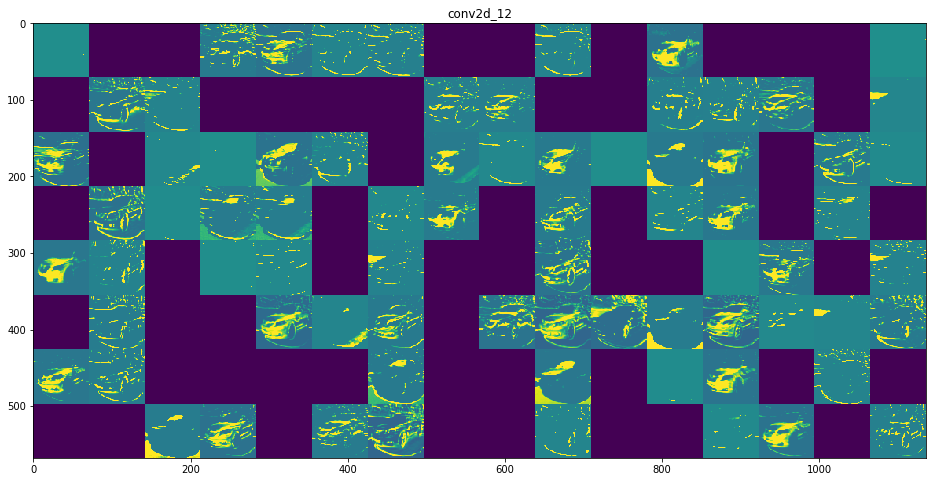

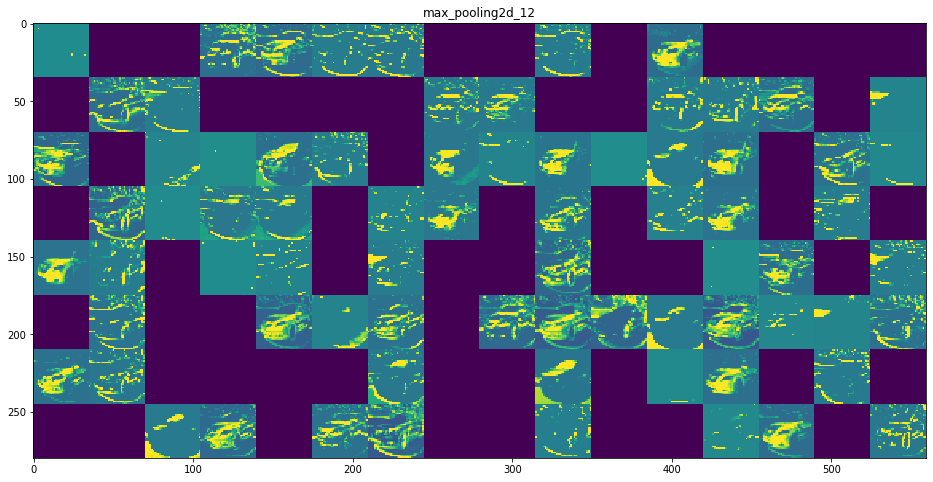

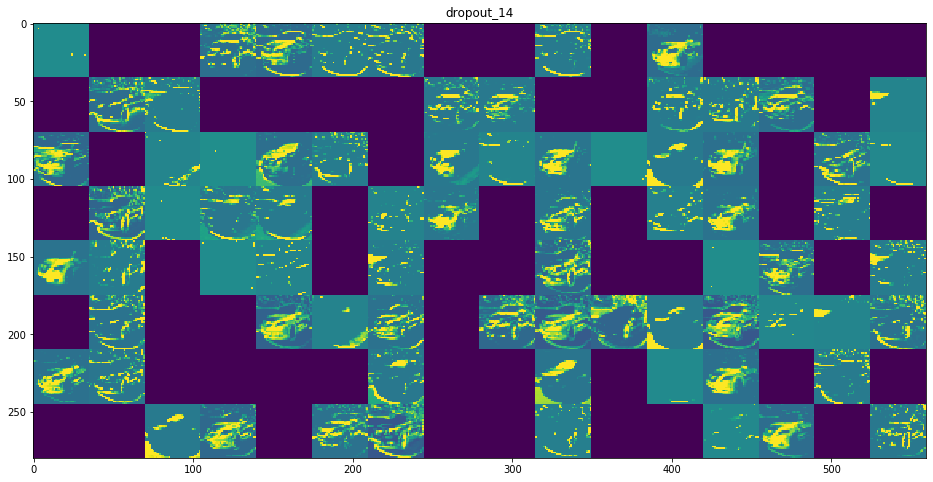

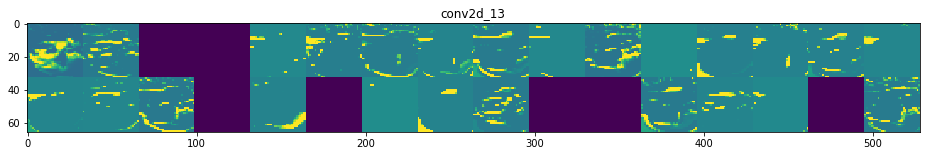

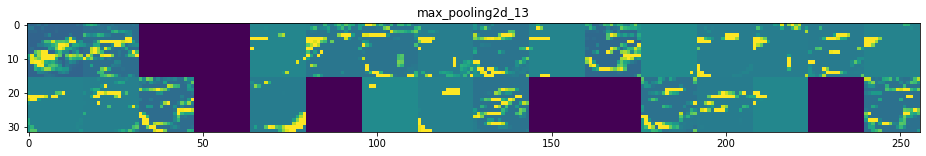

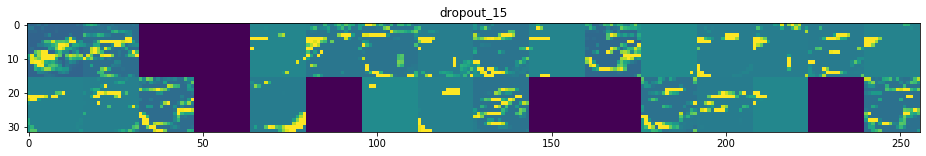

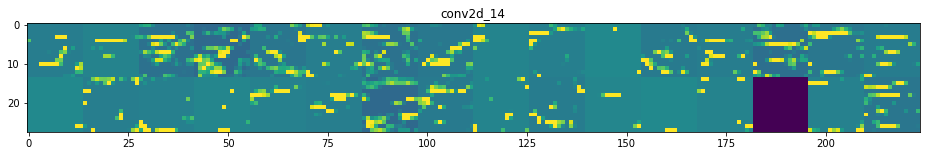

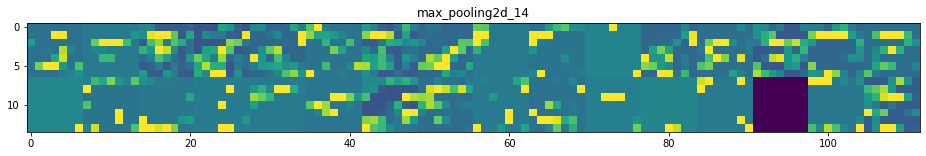

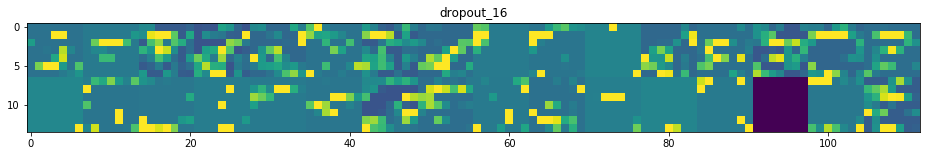

In [82]:
# adopted code from towardsdatascience blogpost on visualizing intermediate activation in CNN with keras

layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Conclusion

## Recommendation